## 배운 것

* 데이터프레임의 데이터타입을 하나로 바꿀경우: df.astype(데이터형=str float..)

* 데이터프레임에서 행을 제거할때: df.drop('인덱스 명')

* 데이터프레임에서 두 column간 데이터의 중복값을 제거하는 경우: set으로 바꿔서 빼준다
set(df31_1['상호명']) - set(df31['상호명'])

* 데이터프레임 원소 중 특정단어 찾기: df['상호명'].astype(str).str.contains('(베|배)스킨라빈스')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action= 'ignore')

In [2]:
# matplotlib 한글깨지는 현상 생김 -> 환경설정 해줘야 함


import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [3]:
df = pd.read_csv("./Pandas_data_file/소상공인시장진흥공단_상가(상권)정보_20210930/소상공인시장진흥공단_상가(상권)정보_서울_202109.csv")
df.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,22767534,BYC상신점,상신점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1171011300100360000022458,성암빌딩,서울특별시 송파구 오금로 527,138110,5768.0,NaN,1,NaN,127.147321,37.493054
1,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613


In [4]:
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          266267
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      19473
표준산업분류명       19473
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명            645
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         65471
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        284885
건물관리번호            0
건물명          167594
도로명주소             0
구우편번호             0
신우편번호             5
동정보          296772
층정보          121746
호정보          260205
경도                0
위도                0
dtype: int64

In [5]:
# 베스킨라빈스 vs 던킨도너츠 의 지역별 매장수를 비교하시오
# 각각 매장수?
#각각 어느 구에 매장수가 많은지 비교

In [6]:
# 데이터 파악 

# 필요한 정보 : 상호명 위치 
# 위치를 나타내는 column 이 정확히 뭔지 잘 모르는 상황

# column명
# df.columns()   TypeError: 'Index' object is not callable '인덱스'객체를 호출할 수 없다

df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
len(df.columns)  # column: 39개 

39

In [8]:
# 위치에 관련된 column 을 찾아보면 -> '시도명', '시군구명' 

In [9]:
#데이터확인
#시도명
df['시도명'].head()

0    서울특별시
1    서울특별시
2    서울특별시
3    서울특별시
4    서울특별시
Name: 시도명, dtype: object

In [10]:
#시군구명
df['시군구명'].unique()  # 시군구명 이 위치데이터에 적합

array(['송파구', '영등포구', '성동구', '동작구', '종로구', '서초구', '강남구', '마포구', '양천구',
       '서대문구', '중랑구', '은평구', '성북구', '강동구', '관악구', '광진구', '중구', '동대문구',
       '용산구', '강서구', '노원구', '강북구', '구로구', '금천구', '도봉구'], dtype=object)

In [11]:
# 매장개수 : 상호명, 매장위치 : 시군구명 으로 데이터 수집

In [12]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [13]:
# 매장개수 찾기

# 매장 상호명이 어떤식으로 되어있는지 확인해야한다.
print(df['상호명'].unique())

['BYC상신점' '제중건강원' '민속악기사' ... '봄쥬얼리' '아이디어뱅' '애프터아트']


In [14]:
# # 모두 출력해보는법
# for i in df['상호명'].unique():
#     print(i, end='  ')
    
# 데이터가 너무 많아서 의미 없다

In [15]:
# 베스킨라빈스 매장 데이터 추출

In [16]:
df['상호명'].str.contains('(베|배)스킨라빈스')  # .str.contains 판다스 에서 쓸 수 있는 문법

0         False
1         False
2         False
3         False
4         False
          ...  
325875    False
325876    False
325877    False
325878    False
325879    False
Name: 상호명, Length: 325880, dtype: object

In [17]:
df['상호명'].str.contains('(베|배)스킨라빈스').isnull().sum()

1

In [43]:
df['상호명']

0              BYC상신점
1               제중건강원
2               민속악기사
3                쓰리에프
4                  채움
             ...     
325875    엘케이공인중개사사무소
325876           봄쥬얼리
325877          아이디어뱅
325878          애프터아트
325879           허브헤어
Name: 상호명, Length: 325880, dtype: object

In [18]:
# 데이터를 boolean 형에서 꺼내려면 새로운 데이터프레임 지정해서 데이터프레임의 column 추출해야함

# df31 = df[df['상호명'].str.contains('(베|배)스킨라빈스')] 

# 하려고 했으나 
# ValueError: Cannot mask with non-boolean array containing NA / NaN values

df31 = df[df['상호명'].astype(str).str.contains('(베|배)스킨라빈스')] 
df31['상호명'].count()

352

In [19]:
# 배스킨라빈스, 베스킨라빈스 제외 다른 이름 검색시 352개 나오는 지 확인

df31_1 = df[df['상호명'].astype(str).str.contains('라빈스')]
df31_1['상호명'].count() # 355개

355

In [20]:
##중요 :데이터프레임 열 간 중복값 제거!! column = series -> set으로 바꿔 빼준다.

# 추가 3개값이 관련있는지 확인
# 집합으로 바꿔서 중복값을 제거

set(df31_1['상호명']) - set(df31['상호명']) #상관없는 데이터


{'벨라빈스', '벨라빈스커피', '벨라빈스커피길음뉴타운점'}

In [21]:
# 배스킨라빈스, 베스킨라빈스 제외 다른 이름 검색시 352개 나오는 지 확인

df31_2 = df[df['상호명'].astype(str).str.contains('(베|배)스킨')]
df31_2['상호명'].count() 

355

In [22]:
set(df31_2['상호명']) - set(df31['상호명']) # 3개를 추가해야한다.

{'배스킨', '베스킨', '써타원베스킨란빈스'}

In [23]:
# '배스킨' 인 지점 정보 확인하기

df[df['상호명']=='써타원베스킨란빈스'] 
# 상권업종소분류명 :아이스크림판매

df[df['상호명']=='배스킨']  # df에서 상호명이 '배스킨'인 것의 데이터프레임

#상권업종소분류명 :'아이스크림판매' 이므로 포함 주소: 서울특별시 구로구 구로동 3-25

df[df['상호명']=='베스킨'] 
# 주소 :서울특별시 강남구 청담동 125-22


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91388,27871116,베스킨,NaN,Q,음식,Q07,패스트푸드,Q07A07,아이스크림판매,I56191,제과점업,11,서울특별시,11680,강남구,1168056500,청담동,1168010400,청담동,1168010400101250022,1,대지,125,22.0,서울특별시 강남구 청담동 125-22,116802122001,서울특별시 강남구 도산대로,521,NaN,1168010400101250022017750,NaN,서울특별시 강남구 도산대로 521,135957,6013.0,NaN,NaN,NaN,127.050366,37.52486


In [24]:
# 영어이름 있는지 확인

df31_e = df[df['상호명'].astype(str).str.contains('baskin|Baskin|baskinrobbins|BaskinRobbins|Baskinrobbins')]
df31_e['상호명'].count() #1개 존재

1

In [25]:
df31_e['상호명'] # 1개 추가해야함

11381    baskinrobbins
Name: 상호명, dtype: object

In [26]:
df31_final = df[df['상호명'].astype(str).str.contains('(베|배)스킨|baskinrobbins')]
df31_final['상호명'].count()

356

In [27]:
# 데이터 검토

df31_final.상권업종대분류명.unique()

array(['음식', '소매'], dtype=object)

In [28]:
df31_final[df31_final['상권업종대분류명']=='소매']  ## 직접 검색해본 결과 베스킨라빈스 맞음

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
168149,20011576,배스킨라빈스,CAFE31압구정점,D,소매,D03,종합소매점,D03B10,할인점,G47119,기타 대형 종합 소매업,11,서울특별시,11680,강남구,1168054500,압구정동,1168010700,신사동,1168010700106140000,1,대지,614,NaN,서울특별시 강남구 신사동 614,116803122007,서울특별시 강남구 압구정로,204,NaN,1168010700106140000009800,대언빌딩,서울특별시 강남구 압구정로 204,135894,6022.0,NaN,1,NaN,127.029381,37.527375


In [29]:
# 던킨도너츠 매장 데이터 추출

In [30]:
df_dunkin = df[df['상호명'].astype(str).str.contains("던킨도너츠|던킨|dunkin|Dunkin|DUNKIN")]
df_dunkin['상호명'].count()

115

In [31]:
df_dun1 = df[df['상호명'].astype(str).str.contains("dunkin|Dunkin|DUNKIN")]
df_dun1['상호명'].count()

1

In [32]:
# 영어 데이터 1개 데이터 확인

df_dun1 = df[df['상호명'].astype(str).str.contains("dunkin|Dunkin|DUNKIN")]
# 데이터 1개 상호명 = DUNKINDOONUTS
df[df['상호명']=='DUNKINDOONUTS']

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
217855,16238189,DUNKINDOONUTS,NaN,Q,음식,Q08,제과제빵떡케익,Q08A01,제과점,I56191,제과점업,11,서울특별시,11650,서초구,1165052000,서초2동,1165010800,서초동,1165010800113280000,1,대지,1328,NaN,서울특별시 서초구 서초동 1328,116502102001,서울특별시 서초구 강남대로,373,NaN,1165010800113280001000001,홍우빌딩,서울특별시 서초구 강남대로 373,137858,6621.0,NaN,1,NaN,127.027989,37.495971


In [33]:
# 각각 매장수?

In [34]:
# 베스킨라빈스

df_final = df[df['상호명'].astype(str).str.contains('(베|배)스킨|baskinrobbins')]
df_final['상호명'].count()

356

In [35]:
# 던킨도너츠
df_dun = df[df['상호명'].astype(str).str.contains("던킨도너츠|던킨|dunkin|Dunkin|DUNKIN")]
df_dun['상호명'].count()

115

In [36]:
#각각 어느 구에 매장수가 많은지 비교

In [37]:
#베스킨

df_final.groupby('시군구명')['상호명'].count()

시군구명
강남구     27
강동구     16
강북구      9
강서구     15
관악구     11
광진구     15
구로구     21
금천구      8
노원구     22
도봉구      7
동대문구     9
동작구     11
마포구      9
서대문구    15
서초구     29
성동구      9
성북구     14
송파구     22
양천구     16
영등포구    12
용산구     17
은평구     15
종로구      8
중구       8
중랑구     11
Name: 상호명, dtype: int64

<AxesSubplot:xlabel='시군구명'>

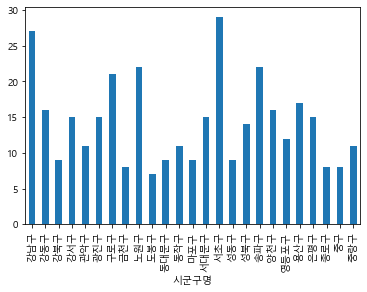

In [38]:
# 그래프

df_final.groupby('시군구명')['상호명'].count().plot(kind='bar')

In [39]:
# 던킨도너츠

df_dun.groupby('시군구명')['상호명'].count()

시군구명
강남구     14
강동구      3
강북구      3
강서구      6
관악구      3
광진구      5
구로구      5
노원구     10
도봉구      1
동대문구     5
동작구      2
마포구      5
서대문구     3
서초구     10
성동구      1
성북구      3
송파구      4
양천구      4
영등포구     4
용산구      7
은평구      4
종로구      4
중구       8
중랑구      1
Name: 상호명, dtype: int64

<AxesSubplot:xlabel='시군구명'>

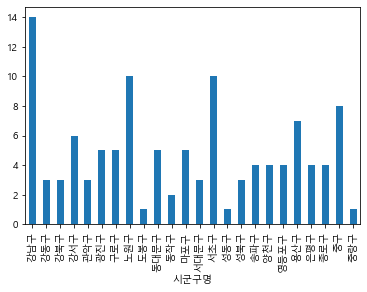

In [105]:
# 그래프

df_dun.groupby('시군구명')['상호명'].count().plot(kind='bar')